# Lariat Waveforms 

Adam Lyon / Fermilab SCD / September 2015

!! Not Complete !!

Jim has code to output the waveform information from a Lariat event. Let's look at it in 3D in ParaView.

The data is in the form of a big CSV file

In [1]:
import numpy as np
import pandas as pd

In [52]:
di = pd.read_csv("data20150919/output_di.csv", header=None)

In [53]:
di.head()

,0,1,2,3,4,5,6,7,8,9,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
0,1,SlicerInput,239,3072,2156.59,1,3,3,3,4,...,-2,-2,-1,-1,0,0,1,1,2,2
1,1,SlicerInput,238,3072,2157.98,1,0,1,2,3,...,-2,-2,-2,-1,-1,0,1,3,4,5
2,1,SlicerInput,237,3072,2153.17,1,6,6,7,8,...,0,1,1,1,1,3,4,3,4,4
3,1,SlicerInput,236,3072,2122.89,1,-3,0,2,0,...,0,-1,-3,-3,1,2,-1,0,2,0
4,1,SlicerInput,235,3072,2146.26,1,-1,-1,-1,-1,...,-1,-1,0,1,0,0,1,1,0,1


Columns `0,1` and `3:5` may be removed. Column 2 is the wire number. The ADC counts start at column 6. 

In [54]:
di.drop(di.columns[0:2], axis=1, inplace=True)
di.drop(di.columns[1:4], axis=1, inplace=True)

In [55]:
di.head()

,2,6,7,8,9,10,11,12,13,14,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
0,239,3,3,3,4,4,4,4,4,4,...,-2,-2,-1,-1,0,0,1,1,2,2
1,238,0,1,2,3,3,5,6,6,6,...,-2,-2,-2,-1,-1,0,1,3,4,5
2,237,6,6,7,8,7,7,7,7,6,...,0,1,1,1,1,3,4,3,4,4
3,236,-3,0,2,0,-2,1,2,-1,-1,...,0,-1,-3,-3,1,2,-1,0,2,0
4,235,-1,-1,-1,-1,-1,0,-1,-1,0,...,-1,-1,0,1,0,0,1,1,0,1


In [56]:
di.shape

(480, 3073)

Let's sort by the wire number so that things come out in the right order. 

In [58]:
di = di.sort_values([2])
di.head()

,2,6,7,8,9,10,11,12,13,14,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
239,0,2,1,1,1,1,1,1,0,0,...,3,3,4,4,3,4,4,4,4,4
238,1,1,0,1,1,1,0,0,1,0,...,2,2,3,3,4,3,4,4,3,4
237,2,2,1,1,1,0,-1,-1,-2,-1,...,0,1,2,2,1,2,1,1,2,1
236,3,0,-1,0,0,0,-1,-1,0,-1,...,5,5,6,7,7,7,7,7,7,6
235,4,2,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,4,3,3


There are 480 wires in the event. 240 "U" and 240 "V". Column `2` is the wire number. Wires # < 240 are U and wire # >= 240 are V. 

Let's get the U wires

In [59]:
u = di[ di[2] < 240 ]

In [60]:
u.shape

(240, 3073)

In [61]:
u.head()

,2,6,7,8,9,10,11,12,13,14,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
239,0,2,1,1,1,1,1,1,0,0,...,3,3,4,4,3,4,4,4,4,4
238,1,1,0,1,1,1,0,0,1,0,...,2,2,3,3,4,3,4,4,3,4
237,2,2,1,1,1,0,-1,-1,-2,-1,...,0,1,2,2,1,2,1,1,2,1
236,3,0,-1,0,0,0,-1,-1,0,-1,...,5,5,6,7,7,7,7,7,7,6
235,4,2,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,4,3,3


In [62]:
v = di[ di[2] >= 240]

In [65]:
v.head()

,2,6,7,8,9,10,11,12,13,14,...,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077
479,240,4,3,2,3,2,1,0,0,-1,...,5,6,7,7,7,8,8,8,9,8
478,241,2,2,2,2,1,1,1,1,-1,...,-2,-2,-2,-2,-1,0,0,1,2,2
477,242,11,10,9,8,7,6,6,4,4,...,1,1,1,2,4,3,4,4,4,5
476,243,6,5,5,4,3,3,2,2,2,...,0,1,2,2,3,3,4,5,4,5
475,244,1,1,0,0,0,0,0,0,0,...,-1,-1,1,0,1,1,1,2,1,2


In [66]:
v.shape

(240, 3073)

So there are 240 U wires, 240 V wires, and each has 3072 time entries. Each entry has an ampliude. The U and V values go together. What we eventually want is a structure like 

    U,V,T,Uamp,Vamp
    
Where we'll transform `U,V,T` into position values $x,y,z$ with two scalar arrays for the amplitudes. The "cell" is a wire crossing (e.g. U#1 crosses V#200 at a time T with amplitude Uamp on the U wire and Vamp on the V wire))

Let's relable the columns

In [67]:
u.columns = ['U'] + range(3072)
v.columns = ['V'] + range(3072)

In [68]:
u.head()

,U,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
239,0,2,1,1,1,1,1,1,0,0,...,3,3,4,4,3,4,4,4,4,4
238,1,1,0,1,1,1,0,0,1,0,...,2,2,3,3,4,3,4,4,3,4
237,2,2,1,1,1,0,-1,-1,-2,-1,...,0,1,2,2,1,2,1,1,2,1
236,3,0,-1,0,0,0,-1,-1,0,-1,...,5,5,6,7,7,7,7,7,7,6
235,4,2,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,4,3,3


In [69]:
v.head()

,V,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
479,240,4,3,2,3,2,1,0,0,-1,...,5,6,7,7,7,8,8,8,9,8
478,241,2,2,2,2,1,1,1,1,-1,...,-2,-2,-2,-2,-1,0,0,1,2,2
477,242,11,10,9,8,7,6,6,4,4,...,1,1,1,2,4,3,4,4,4,5
476,243,6,5,5,4,3,3,2,2,2,...,0,1,2,2,3,3,4,5,4,5
475,244,1,1,0,0,0,0,0,0,0,...,-1,-1,1,0,1,1,1,2,1,2


For the `V` wire #'s bring them back into a range of 0-239 to match the `U` wires

In [70]:
v.loc[:,'V'] = v.loc[:,'V']-240

In [71]:
v.head()

,V,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
479,0,4,3,2,3,2,1,0,0,-1,...,5,6,7,7,7,8,8,8,9,8
478,1,2,2,2,2,1,1,1,1,-1,...,-2,-2,-2,-2,-1,0,0,1,2,2
477,2,11,10,9,8,7,6,6,4,4,...,1,1,1,2,4,3,4,4,4,5
476,3,6,5,5,4,3,3,2,2,2,...,0,1,2,2,3,3,4,5,4,5
475,4,1,1,0,0,0,0,0,0,0,...,-1,-1,1,0,1,1,1,2,1,2


Now we want to reshape data frames to be `U,T,amp` (replace `U` with `V` for the other data frame).

Let's write out VTK image files for the U and V wires (separately) so we can see the wave forms. We'll do $x$ as the time, $y$ as the wire number, and the $z$ will always be 1 (we'll either color or warp to see the amplitude). Note that I previously had the wire as $x$ but I think it will look better with $t$ going horizontally. Loading a VTK image means that the $x$ component iterates first, then $y$, then $z$. So this means that we want data in the form of,

    adcU0T0, adcV0T0
    adcU0T1, adcV0T1
    ...
    adcU0T3071, adc0T3071
    adcU1T0, adcV1T0
    ...
    
So we want to run down the columns and output
    

In [109]:
w = open('waveform.csv', 'w')
w.write("adcU/I,adcV/I\n")  # Attributes of the grid
w.write("%s,%s,1\n" % (u.shape[1]-1, u.shape[0]))  # dimensions  (need to drop the wire number column)
w.write("1,1,1\n")  # Spacing of 1
w.write("0,0,0\n")  # origin

In [113]:
# Writing out x=wire, y=time  Ok - this is really ugly
#for timeCol in range(u.shape[1]-1):
#    out = zip( u.iloc[:, timeCol+1], v.iloc[:, timeCol+1])  # Add one since first col is wire #
#    for i in range(len(out)):
#        w.write("%s,%s  # %s,%s\n" % (out[i][0], out[i][1], i, timeCol) )

In [111]:
# Writing out x=time, y=wire  OK - this is really ugly
for wireRow in range(u.shape[0]):
    out = zip( u.iloc[wireRow][1:], v.iloc[wireRow][1:] )  # Skip the wire number column
    for i in range(len(out)):
        w.write("%s,%s  # time=%s wire=%s\n" % (out[i][0], out[i][1], i, wireRow) )

In [112]:
w.close()

Convert the CSV file into VTK Imagedata

In [114]:
!pvpython convertCSVToVTI.py waveform.csv

Attribute types are:  [('adcU', <type 'int'>), ('adcV', <type 'int'>)]
Dimensions are:  [3072, 240, 1]
Grid spacing is:  [1.0, 1.0, 1.0]
Grid origin is:  [0.0, 0.0, 0.0]
[('adcU', '<i8'), ('adcV', '<i8')]
Making scalar adcU
Making scalar adcV
Writing waveform.vti


Now we load these into ParaView for viewing. Here are some scripts to make screenshots.

In [65]:
import subprocess as sp
def doParaview(pvsmFile, command, viewWH=None, plugin=None, verbose=False):
    """Run pvpython preparing plugins, view, and state and running command. Returns stdout and stderr"""
    pvpyC = "from paraview.simple import *\n"
    pvpyC += "paraview.simple._DisableFirstRenderCameraReset() # Avoid camera reset\n"
    if plugin:
        pvpyC += 'LoadPlugin("%s", True, globals())\n' % plugin
    pvpyC += 'LoadState("%s")\n' % pvsmFile
    if viewWH:
        pvpyC += 'r=GetActiveViewOrCreate("RenderView")\n'
        pvpyC += 'r.ViewSize=[%s,%s]\n' % (viewWH[0], viewWH[1])    
    pvpyC += 'RenderAllViews()\n'
    pvpyC += command
    
    if verbose:
        print 'Commands:'
        print pvpyC

    p = sp.Popen("pvpython", stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.PIPE)
    so, se = p.communicate(input=pvpyC)
    
    if so != '':
        print so
        
    if se != '':
        print se
    
    return so, se

In [66]:
from IPython.display import Image
import os
def paraviewScreenShot(pvsmFile, imageDir="images", viewWH=None, mag=1, plugin=None, verbose=False):
    """Make a screenshot from a state file"""

    fname, fext = os.path.splitext( os.path.basename(pvsmFile) )
    pngFile = imageDir + "/" + fname + ".png"
    command = 'layout=GetLayout()\n'
    command += 'SaveScreenshot("%s", layout=layout, magnification=%s)\n' % (pngFile, mag)
    
    so, se = doParaview(pvsmFile, command, viewWH, plugin, verbose)
    
    if not se:
        return Image(filename=pngFile)

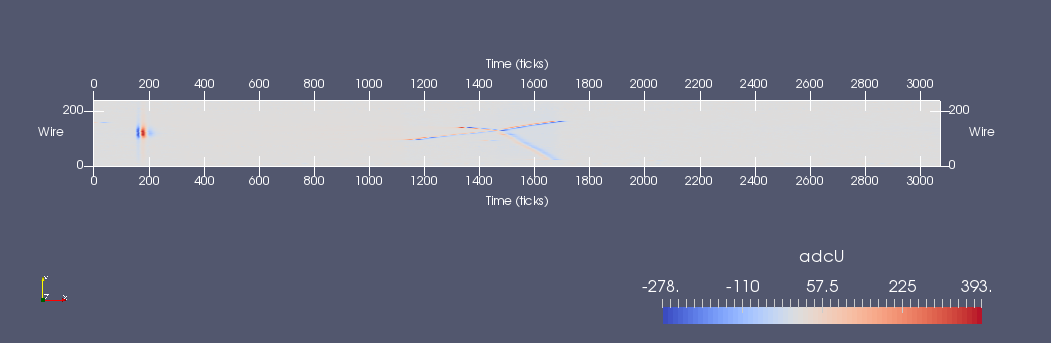

In [67]:
paraviewScreenShot("state/wvpng_1a.pvsm")

The above is the wire ADC for the U (induction) wires. 

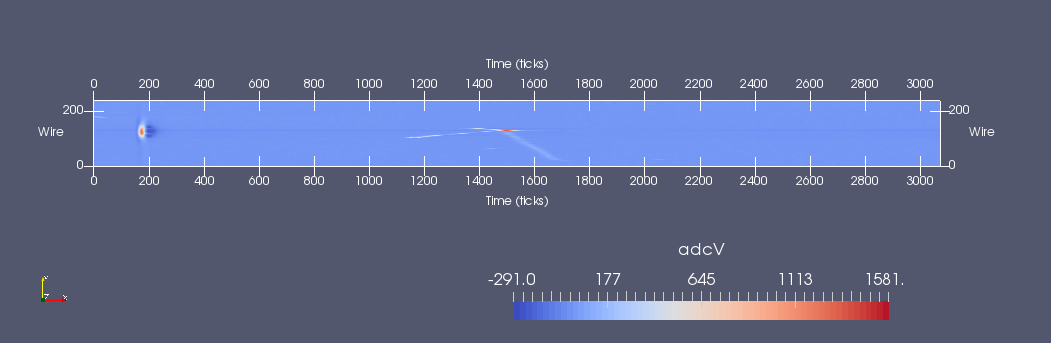

In [68]:
paraviewScreenShot("state/wvpng_1b.pvsm")

The above is the wire ADC for the V (collection) wires.

We can also warp the mesh (by adding the point) by using the warp (scalar) filter.

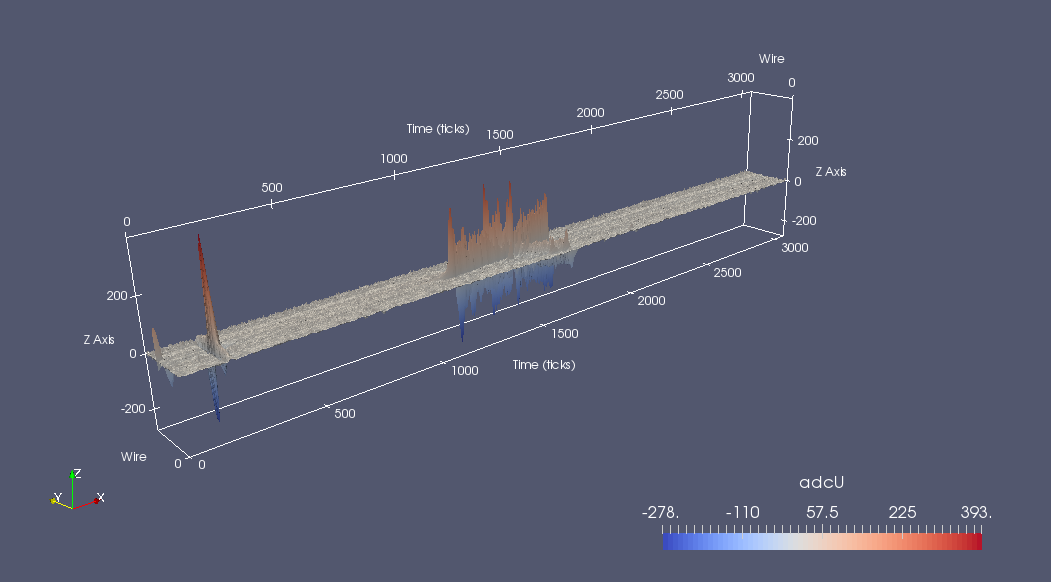

In [69]:
paraviewScreenShot("state/wvpng_2a.pvsm")

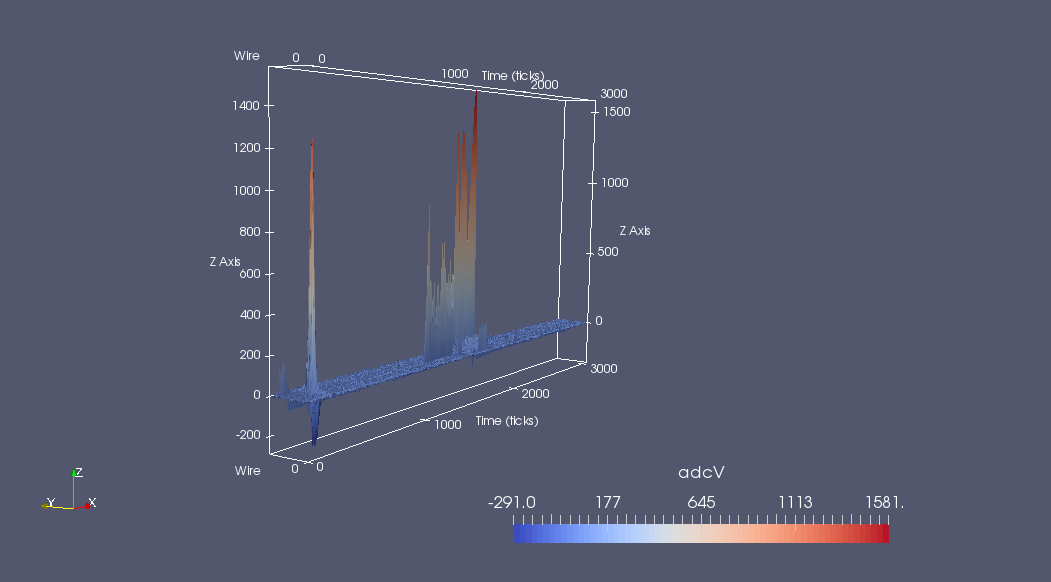

In [70]:
paraviewScreenShot("state/wvpng_2b.pvsm")